In [59]:
#  importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pickle
np.random.seed(42)
import pickle  # Import pickle to save the model
import random
np.random.seed(42)
random.seed(42)





In [60]:
data=pd.read_csv("/Users/abdullahifarahabdi/Downloads/cleaned_total_hiv_aids_deaths_africa.csv")

In [61]:
data.head()

,Year,Total_HIV_AIDS_Deaths
0,1990,265953
1,1991,344109
2,1992,434888
3,1993,536854
4,1994,647238


In [62]:
data.tail()

,Year,Total_HIV_AIDS_Deaths
29,2019,646146
30,2020,460000
31,2021,420000
32,2022,380000
33,2023,390000


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Year                   34 non-null     int64
 1   Total_HIV_AIDS_Deaths  34 non-null     int64
dtypes: int64(2)
memory usage: 676.0 bytes


In [64]:
data.shape

(34, 2)

In [65]:

#: Identify the year with the highest deaths
max_death_year = data.loc[data['Total_HIV_AIDS_Deaths'].idxmax()]
print(f"Year with highest deaths: {max_death_year['Year']}, Deaths: {max_death_year['Total_HIV_AIDS_Deaths']}")

Year with highest deaths: 2004, Deaths: 1501325


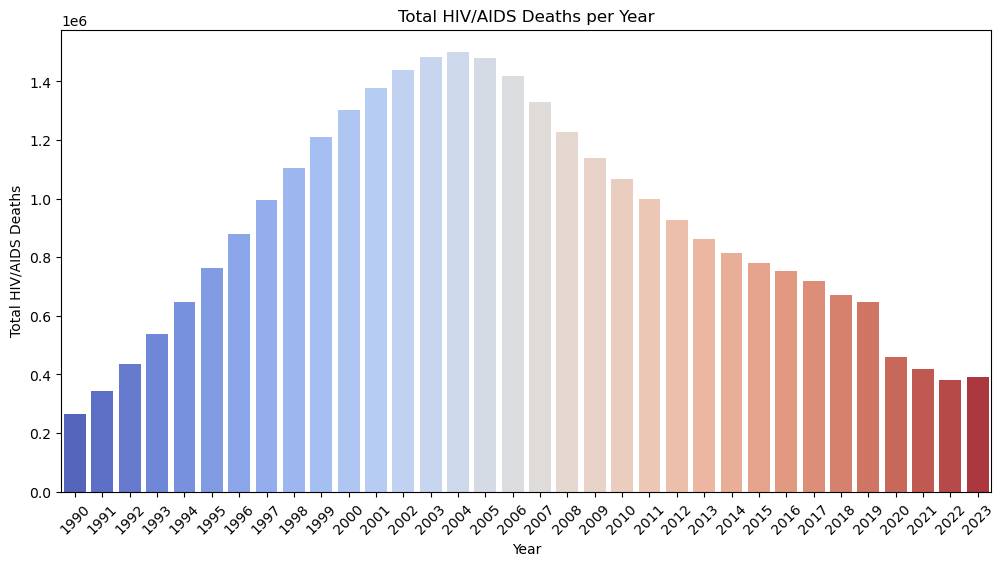

In [66]:
# 📊 **Bar Graph**
plt.figure(figsize=(12, 6))
sns.barplot(x=data['Year'], y=data['Total_HIV_AIDS_Deaths'], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Total HIV/AIDS Deaths')
plt.title('Total HIV/AIDS Deaths per Year')
plt.show()

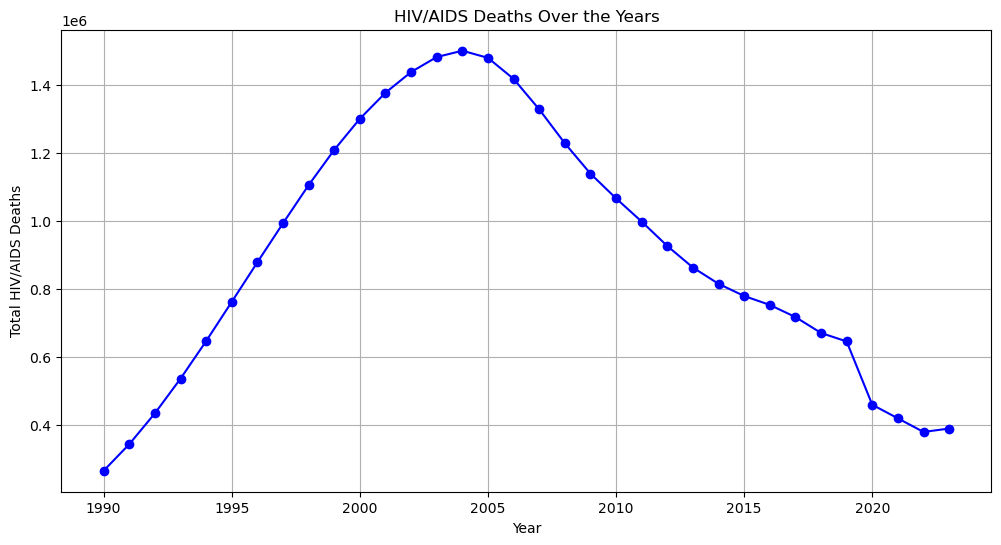

In [67]:
# 📈 **Line Graph**
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Total_HIV_AIDS_Deaths'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Total HIV/AIDS Deaths')
plt.title('HIV/AIDS Deaths Over the Years')
plt.grid(True)
plt.show()

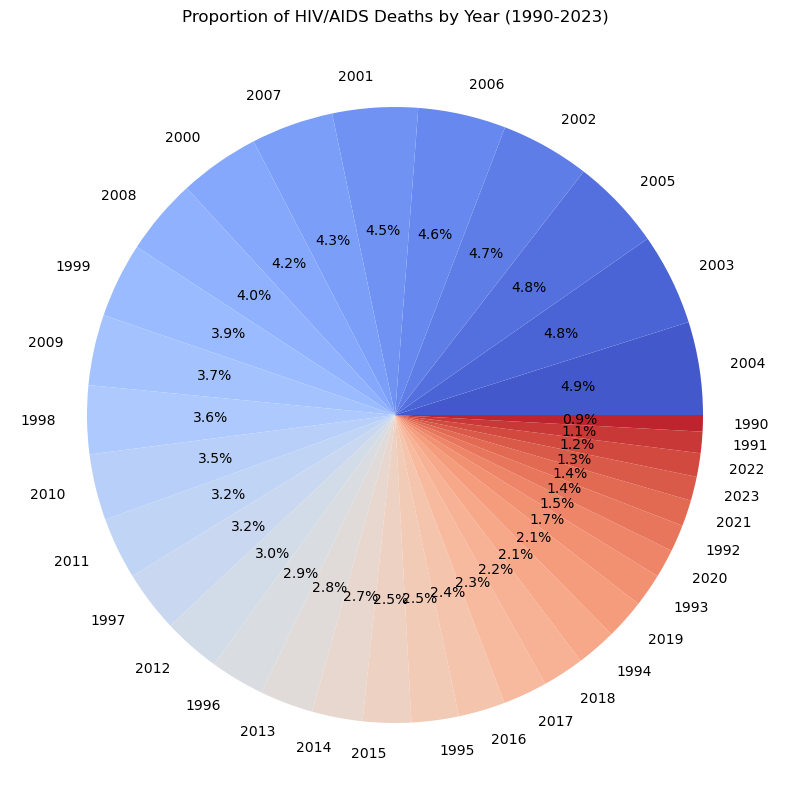

In [68]:
# Sort data in descending order for better visualization
data_sorted = data.sort_values(by='Total_HIV_AIDS_Deaths', ascending=False)

# 📊 **Pie Chart for All Years (1990-2023)**
plt.figure(figsize=(10, 10))
plt.pie(
    data_sorted['Total_HIV_AIDS_Deaths'], 
    labels=data_sorted['Year'], 
    autopct='%1.1f%%',  # Display percentage values
    colors=sns.color_palette("coolwarm", len(data_sorted))
)
plt.title('Proportion of HIV/AIDS Deaths by Year (1990-2023)')
plt.show()

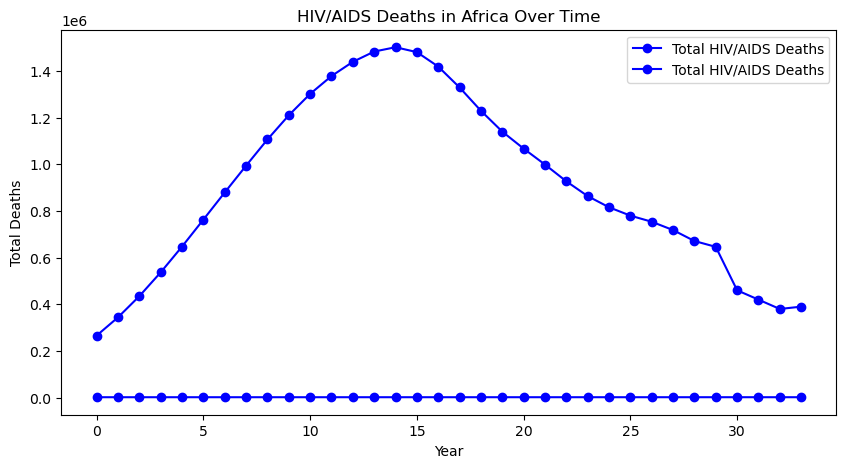

In [69]:
# : Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))
plt.plot(data, marker='o', linestyle='-', color='b', label='Total HIV/AIDS Deaths')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('HIV/AIDS Deaths in Africa Over Time')
plt.legend()
plt.show()

In [70]:

# Convert 'Year' column to datetime format with 31st December of each year
data['Year'] = pd.to_datetime(data['Year'].astype(str) + '-12-31', format='%Y-%m-%d')

# Set 'Year' as the index
data.set_index('Year', inplace=True)

# Verify the change
print(data.head())


            Total_HIV_AIDS_Deaths
Year                             
1990-12-31                 265953
1991-12-31                 344109
1992-12-31                 434888
1993-12-31                 536854
1994-12-31                 647238


In [71]:
data.isnull().sum()

Total_HIV_AIDS_Deaths    0
dtype: int64

In [72]:
data.head()

,Total_HIV_AIDS_Deaths
Year,
1990-12-31,265953
1991-12-31,344109
1992-12-31,434888
1993-12-31,536854
1994-12-31,647238


In [73]:
data.tail()

,Total_HIV_AIDS_Deaths
Year,
2019-12-31,646146
2020-12-31,460000
2021-12-31,420000
2022-12-31,380000
2023-12-31,390000


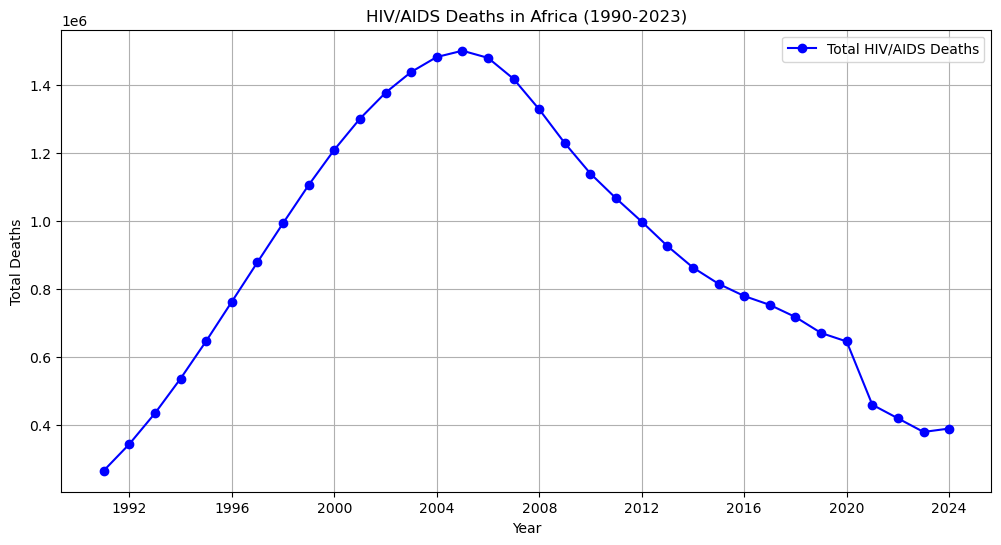

In [74]:
# 📈 **Plot the time series data**
plt.figure(figsize=(12, 6))
plt.plot(data, marker='o', linestyle='-', color='b', label='Total HIV/AIDS Deaths')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('HIV/AIDS Deaths in Africa (1990-2023)')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
print(type(data))
print(data.head())

<class 'pandas.core.frame.DataFrame'>
            Total_HIV_AIDS_Deaths
Year                             
1990-12-31                 265953
1991-12-31                 344109
1992-12-31                 434888
1993-12-31                 536854
1994-12-31                 647238


In [76]:
print(data.columns)


Index(['Total_HIV_AIDS_Deaths'], dtype='object')


In [77]:
# Step 3: Check for Stationarity
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is non-stationary. Differencing needed.")

adf_test(data['Total_HIV_AIDS_Deaths'])

ADF Statistic: -3.0851077784245837
p-value: 0.027675089874670728
The data is stationary.


In [78]:
# Step 6: Split Data into Training and Testing Sets
train = data.loc[:'2013']  # Training data from 1990 to 2013
test = data.loc['2014':'2023']  # Testing data from 2014 to 2023


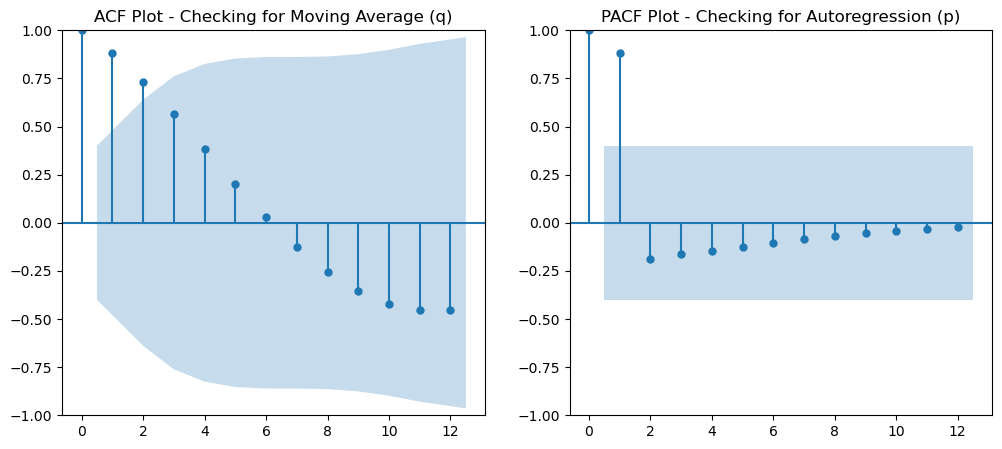

In [79]:
# Create a figure with two subplots (ACF on the left, PACF on the right)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the ACF (Autocorrelation Function)
plot_acf(train['Total_HIV_AIDS_Deaths'], ax=axes[0])  
axes[0].set_title("ACF Plot - Checking for Moving Average (q)")

# Plot the PACF (Partial Autocorrelation Function)
plot_pacf(train['Total_HIV_AIDS_Deaths'], ax=axes[1])  
axes[1].set_title("PACF Plot - Checking for Autoregression (p)")

# Show the plots
plt.show()


In [80]:
# Step 7: Use Auto ARIMA to Find Best Parameters

best_arima = auto_arima(
    train['Total_HIV_AIDS_Deaths'], 
    seasonal=False,  # No seasonality
    stepwise=True,   # Faster model selection
    trace=True       # Print progress of model selection
)

# Print the best model's summary
print(best_arima.summary())


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=492.626, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=528.009, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=498.352, Time=0.01 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=493.972, Time=0.00 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=484.515, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=486.210, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=502.062, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=502.094, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=543.757, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=482.568, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=498.231, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=494.983, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=484.207, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=501.958, 

In [81]:
#step 8 Visualizing Training and Testing Data

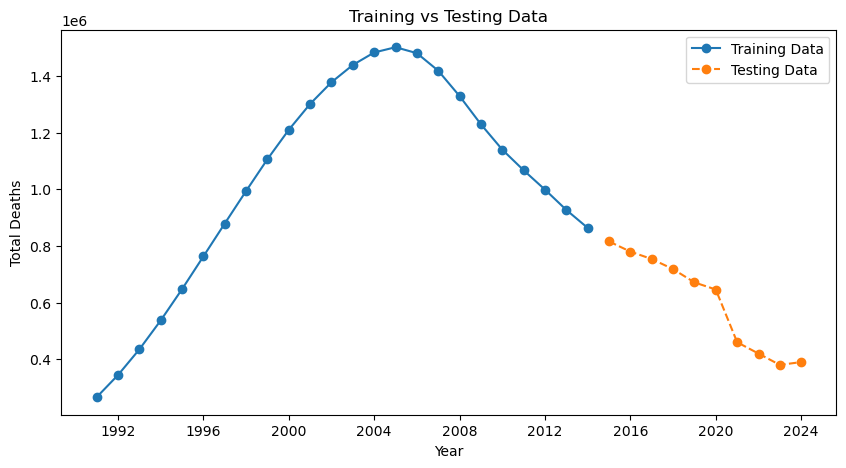

In [82]:

plt.figure(figsize=(10, 5))
plt.plot(train, label='Training Data', marker='o', linestyle='-')
plt.plot(test, label='Testing Data', marker='o', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Training vs Testing Data')
plt.legend()
plt.show()

In [83]:

# Step 8: Fit the Best ARIMA Model

from statsmodels.tsa.arima.model import ARIMA
import pickle  # Import pickle to save the model

# Train ARIMA model with the best parameters
model = ARIMA(train['Total_HIV_AIDS_Deaths'], order=(1, 2,3 ))
model_fit = model.fit()

# Save the trained model
with open("arima_model.pkl", "wb") as f:
    pickle.dump(model_fit, f)

print("✅ Model trained and saved successfully.")





✅ Model trained and saved successfully.


In [84]:
forecast_steps = 7  # Forecast for 7 years from 2024 to 2030
start_year = 2024  # Start forecasting from 2024

# Extend data index to include missing years (2014-2023)
last_year = train.index[-1].year  # Get last year in training data (should be 2013)
years_to_extend = list(range(last_year + 1, start_year))  # Missing years (2014-2023)

# Generate future year index from 2024 to 2030
future_years = pd.date_range(start=str(start_year), periods=forecast_steps, freq='Y')

# ✅ Predict for 2014-2023 first, then 2024-2030
model_extended = model_fit.predict(start=len(train), end=len(train) + len(years_to_extend) + forecast_steps - 1)

# ✅ Remove 2014-2023, keeping only 2024-2030
future_forecast = model_extended[len(years_to_extend):]

# Convert forecast to DataFrame and assign correct index
forecast_df = pd.DataFrame({'Predicted_HIV_Deaths': future_forecast})
forecast_df.index = future_years  # Set index to future years

# Print the forecasted values
print(forecast_df)



            Predicted_HIV_Deaths
2024-12-31         406897.474823
2025-12-31         383428.816471
2026-12-31         362407.028648
2027-12-31         343722.275701
2028-12-31         327269.652306
2029-12-31         312948.962152
2030-12-31         300664.506559


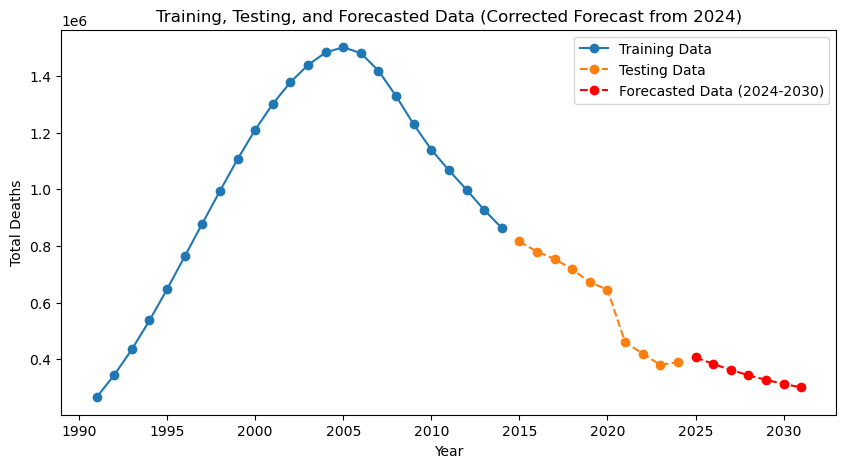

In [85]:
# ✅ Visualizing Training, Testing, and Corrected Forecast
plt.figure(figsize=(10, 5))
plt.plot(train, label='Training Data', marker='o', linestyle='-')
plt.plot(test, label='Testing Data', marker='o', linestyle='dashed')
plt.plot(forecast_df, label='Forecasted Data (2024-2030)', marker='o', linestyle='dashed', color='r')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Training, Testing, and Forecasted Data (Corrected Forecast from 2024)')
plt.legend()
plt.show()

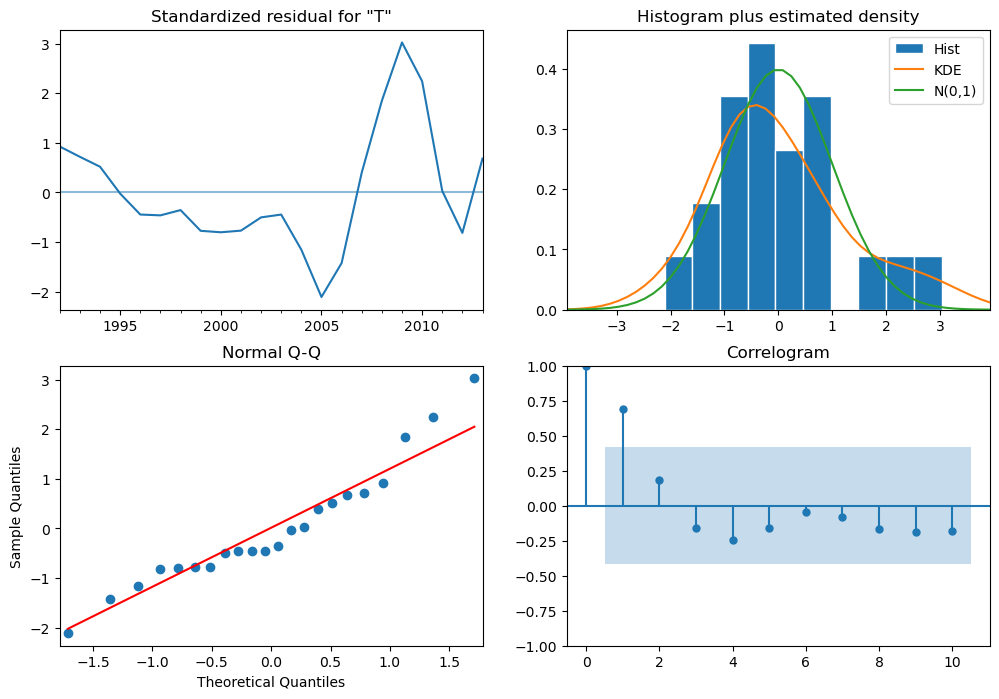

In [86]:
# Step 8: Model Diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

In [87]:
#performing a Ljung-Box test on residuals

In [88]:
from statsmodels.stats.diagnostic import acorr_ljungbox


ljung_box_results = acorr_ljungbox(model_fit.resid, lags=[10], return_df=True)

print(ljung_box_results)


     lb_stat  lb_pvalue
10  6.099577   0.806829


In [89]:
 #performing the ARCH TEST 

In [90]:
from statsmodels.stats.diagnostic import het_arch

# Perform ARCH test for heteroscedasticity
arch_stat, arch_pvalue, _, _ = het_arch(model_fit.resid)

print(f"ARCH Test Statistic: {arch_stat:.4f}")
print(f"p-value: {arch_pvalue:.4f}")


ARCH Test Statistic: 7.9664
p-value: 0.0928


In [91]:
#check residual

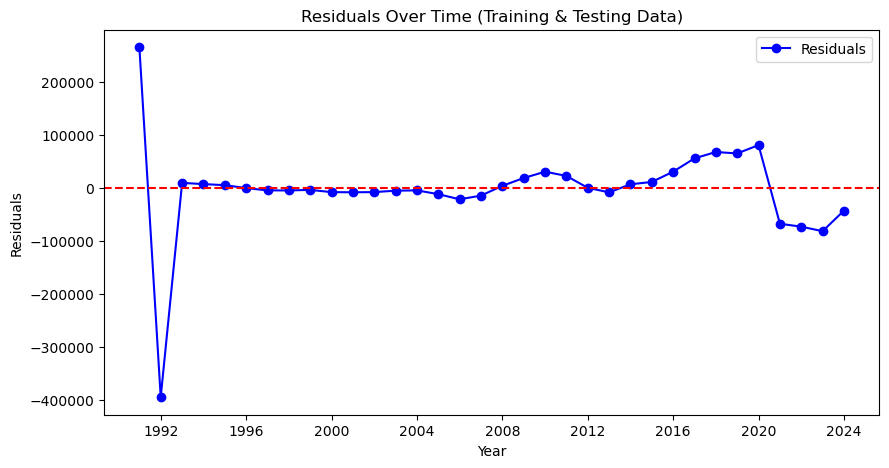

In [92]:
# Compute residuals for training data
train_residuals = train['Total_HIV_AIDS_Deaths'] - model_fit.fittedvalues

# Compute residuals for test data
test_forecast = model_fit.forecast(steps=len(test))
test_residuals = test['Total_HIV_AIDS_Deaths'] - test_forecast

# Combine residuals for full period (training + testing)
full_residuals = pd.concat([train_residuals, test_residuals])

# Plot residuals over time
plt.figure(figsize=(10, 5))
plt.plot(full_residuals, marker='o', linestyle='-', color='b', label='Residuals')
plt.axhline(y=0, color='red', linestyle='dashed')  # Reference line at zero
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('Residuals Over Time (Training & Testing Data)')
plt.legend()
plt.show()


In [93]:
# ✅ Ensure forecast_steps matches the number of predicted values
forecast_steps = len(future_forecast)

# ✅ Define the correct future years, ensuring the length matches future_forecast
future_years = list(range(2023, 2023 + forecast_steps))

# ✅ Convert forecasted values into a DataFrame
forecast_df = pd.DataFrame({'Year': future_years, 'Predicted_HIV_Deaths': future_forecast})

# ✅ Convert 'Year' to a string for better plotting
forecast_df['Year'] = forecast_df['Year'].astype(str)

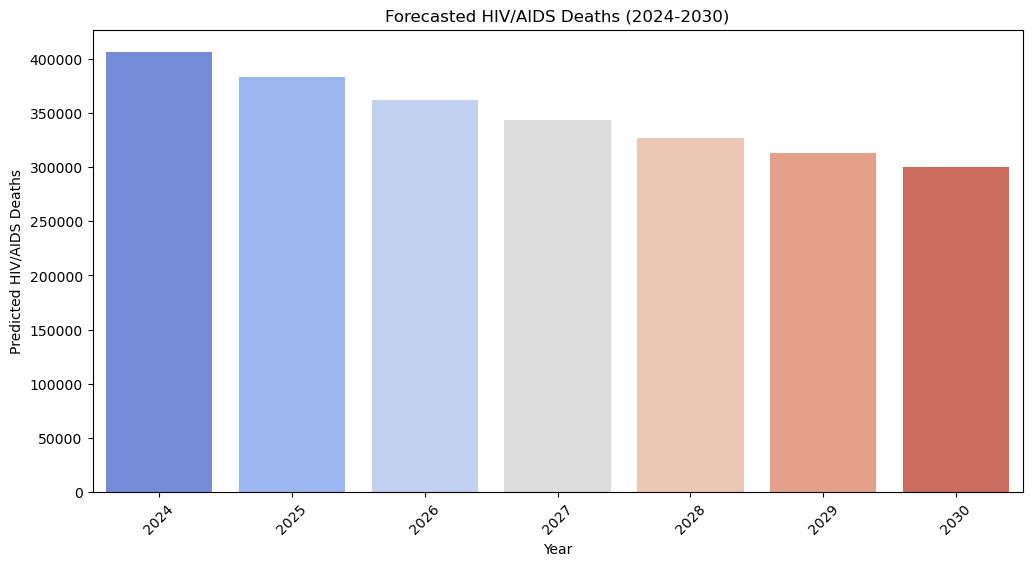

In [94]:
# 📊 Bar Graph - Forecasted Data (2024-2030)
plt.figure(figsize=(12, 6))

# Filter forecast data to include only years from 2024 onwards
forecast_filtered = forecast_df[forecast_df.index.year >= 2024]

# Create bar plot
sns.barplot(x=forecast_filtered.index.year, y=forecast_filtered['Predicted_HIV_Deaths'], palette="coolwarm")

# Formatting
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Predicted HIV/AIDS Deaths')
plt.title('Forecasted HIV/AIDS Deaths (2024-2030)')
plt.show()


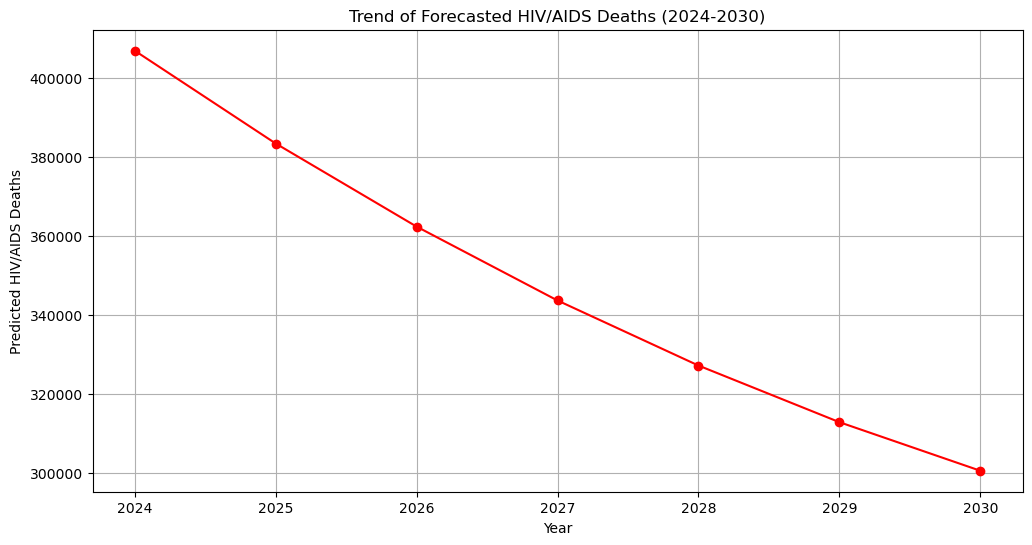

In [95]:
#📈 Line Graph - Forecasted Data (2024-2030)
plt.figure(figsize=(12, 6))

# Filter forecast data to include only years from 2024 onwards
forecast_filtered = forecast_df[forecast_df.index.year >= 2024]

# Create line plot
plt.plot(forecast_filtered.index.year, forecast_filtered['Predicted_HIV_Deaths'], marker='o', linestyle='-', color='r')

# Formatting
plt.xlabel('Year')
plt.ylabel('Predicted HIV/AIDS Deaths')
plt.title('Trend of Forecasted HIV/AIDS Deaths (2024-2030)')
plt.grid(True)
plt.show()


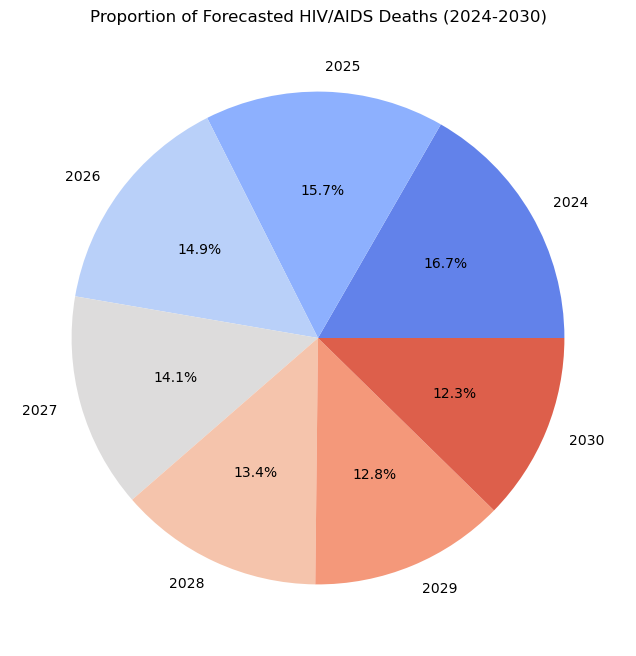

In [96]:
#  Pie Chart - Forecasted Data Distribution (2024-2030)
plt.figure(figsize=(8, 8))

# Filter forecast data to include only years from 2024 onwards
forecast_filtered = forecast_df[forecast_df.index.year >= 2024]

# Create pie chart
plt.pie(forecast_filtered['Predicted_HIV_Deaths'], labels=forecast_filtered.index.year, autopct='%1.1f%%', 
        colors=sns.color_palette("coolwarm", len(forecast_filtered)))

# Formatting
plt.title('Proportion of Forecasted HIV/AIDS Deaths (2024-2030)')
plt.show()




In [97]:
# Generate predictions for the test period
test_forecast = model_fit.forecast(steps=len(test))

# Compute Error Metrics
mae = mean_absolute_error(test['Total_HIV_AIDS_Deaths'], test_forecast)
mse = mean_squared_error(test['Total_HIV_AIDS_Deaths'], test_forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['Total_HIV_AIDS_Deaths'] - test_forecast) / test['Total_HIV_AIDS_Deaths'])) * 100
accuracy = 100 - mape

# Print Error Metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Model Accuracy: {accuracy:.2f}%")

Mean Absolute Error (MAE): 57754.45
Mean Squared Error (MSE): 3806741452.84
Root Mean Squared Error (RMSE): 61698.80
Mean Absolute Percentage Error (MAPE): 10.91%
Model Accuracy: 89.09%
